# Statystyka opisowa - parametry

### Statystyczna analiza danych
**dr inż. Wojciech Artichowicz**

**Katedra Geotechniki i Inżynierii Wodnej PG**

**Statystyka opisowa** zajmuje się wstępnym opisem próby oraz badaniem parametrów położenia, dyspersji i kształtu rozkładów z których te próby pochodzą. Obliczenie wartości wyżej wymienionych parametrów umożliwia uogólnienie danych oraz sformułowanie wniosków na temat własności badanych rozkładów. Ponadto możliwe jest porównanie dwóch lub większej liczby prób (np. określenie, która średnia jest większa, itp.).

#### Dane
W celu prezentacji niżej omówionych podstawowych parametrów statystycznych wykorzystany zostanie następujący zbiór danych:

$$\textbf{x}=\{9{,}0;\; 12{,}0;\; 5{,}0;\; 0{,}23;\; 1{,}3;\; 5{,}5;\; 8{,}11;\; 3{,}33;\; 2{,}1;\; 6{,}32\}$$

Wektor danych $\textbf{x}$ składa się z elementów skalarnych oznaczonych jako $x_i$ dla $i=1,2,...,N$, gdzie $N$ oznacza liczbę elementów wektora $\textbf{x}$.

**Uwaga**: W języku polskim separatorem dziesiętnym (*ang.* decimal separator) jest przecinek, natomiast w języku angielskim jest to kropka. W związku z tym wpisując lub importując dane w celu przeprowadzenia obliczeń należy upewnić się, że wykorzystywany jest adekwatny separator dziesiętny. W przypadku programowania obliczeń wykorzystuje się separator w postaci kropki. Np. w języku Python liczba $2{,}5$ ma postać `2.5`.


### Import podstawowych bibliotek języka Python
W celu przeprowadzenia obliczeń statystycznych należy importować podstawowe biblioteki związane z obliczeniami i wizuzalizacją danych. Wykorzystane zostaną tu następujące biblioteki:
 - [`numpy`](https://numpy.org/) - obiekt tablicy, macierze i algebra liniowa oraz podstawowe funkcje
 - [`scipy.stats`](https://docs.scipy.org/doc/scipy/reference/stats.html)  - funkcje statytyczne
 - [`matplolib`](https://matplotlib.org/) - funkcje tworzące wykresy

In [1]:
import numpy as np # tablice, macierze i algebra liniowa
import scipy.stats as st # biblioteka obliczeń statystycznych
import matplotlib.pyplot as plt # podstawowa wizualizacja / wykresy

#### Utworzenie zmiennej przechowujacej dane
Poniżej utworzono zmienną `x`, w której przechowywane są dane. Do przechowywania danych wykorzystano obiekt tablicy ([`array`](https://numpy.org/doc/stable/reference/generated/numpy.array.html)) z biblioteki [numpy](https://numpy.org/). Należy zwrócić uwagę na wykorzystany separator dziesiętny.

In [2]:
x = np.array([ 9.0, 12.0, 5.0, 0.23, 1.3, 5.5, 8.11, 3.33, 2.1, 6.32])
x

array([ 9.  , 12.  ,  5.  ,  0.23,  1.3 ,  5.5 ,  8.11,  3.33,  2.1 ,
        6.32])

## Parametry położenia

Określają położenie rozkładu (tu empirycznego) na skali pomiarowej. Są jedynmi z najważniejszych charakterystyk, między innymi ze względu na łatwość i intuicyjność ich interpretacji.

### Miary tendencji centralnej

Klasycznymi miarami średniej są średnia arytmetyczna, harmoniczna i geometryczna. 

### Średnie klasyczne
#### Średnia arytmetyczna (*ang.* mean)
Jest najpopularniejszą charakterystyką przeciętnego poziomu badanej cechy. Jest sumą wszystkich obserwacji podzieloną przez ich ilość. Wyraża średni poziom cechy przypadający na jednostkę. Średnia arytmetyczna jest wrażliwa na obserwacje odstające i znacznie się odchyla w przypadku wystąpienia takich obserwacji w próbie.

$$\bar{x}=\frac{1}{N}\sum_{i=1}^{N} x_i=\frac{x_1+x_2+\ldots+x_N}{N}$$
Sposób obliczenia:
$$\bar{x}=\frac{9{,}00+12{,}00+\ldots+ 2{,}10+ 6{,}32}{10}=5{,}289$$

Realizacja obliczeń w języku Python z użyciem funkcji [`tmean()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.tmean.html):

In [3]:
srednia_arytmetyczna = st.tmean(x)
srednia_arytmetyczna

5.289

#### Średnia harmoniczna (*ang.* harmonic mean)
Jest to odwrotność średniej arytmetycznej z odwrotności pomiarów.


$$\bar{x}_H=\frac{N}{\sum_{i=1}^{N} \frac{1}{x_i}}=\frac{N}{\frac{1}{x_1}+\frac{1}{x_2}+\ldots+\frac{1}{x_N}}$$
Sposób obliczenia:
$$\bar{x}_H=\frac{10}{\frac{1}{9{,}00}+\frac{1}{12{,}00}+\ldots+\frac{1}{2{,}10}+\frac{1}{6{,}32}}=1{,}481$$

Średnia harmoniczna zdefiniowana jest tylko dla wartości większych od zera, tj. $x_i>0$ dla $i=1,\ldots, N$.
Realizacja obliczeń w języku Python z użyciem funkcji [`hmean()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.hmean.html):

In [4]:
srednia_harmoniczna = st.hmean(x)
srednia_harmoniczna

1.4811868527213843

#### Średnia geometryczna (*ang.* geometric mean)
Jest pierwiastkiem $N$-tego stopnia z iloczynu obserwacji. Jest zwykle stosowana do określania średniej wartości szeregów czasowych. 

$$\bar{x}_G=\sqrt[\leftroot{3}\uproot{4}N]{\prod_{i=1}^{N}x_i}=
\sqrt[\leftroot{3}\uproot{4}N]{x_1\cdot x_2 \cdot \ldots \cdot x_N}$$

$$\bar{x}_G=\sqrt[\leftroot{3}\uproot{4}10]{9{,}00\cdot 12{,}00 \cdot \ldots \cdot 2{,}10 \cdot 6{,}32}=3{,}550$$

Realizacja obliczeń w języku Python z użyciem funkcji [`gmean()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gmean.html):

In [5]:
srednia_geometryczna = st.gmean(x)
srednia_geometryczna

3.5504459848127374

### Mediana - średnia pozycyjna
**Mediana** jest środkową wartością uporządkowanego szeregu obserwacji. Informuje jaki jest poziom cechy jednostki dzielącej próbę na dwie równe części. Ponadto mediana jest kwantylem rzędu 0,5. 

Jeśli liczba obserwacji jest nieparzysta to medianą jest środkowy element uporządkowanej próby, jeśli liczba obserwacji jest parzysta to mediana jest średnią arytmetyczną dwóch elementów znajdujących się w środku.

$$Me=\begin{cases}
x_{(N+1)/2} & \text{dla } N \text{ nieparzystego}\\
\frac{x_{N/2}+x_{N/2+1}}{2} & \text{dla } N \text{ parzystego}
\end{cases} $$

Sposób obliczenia:
 1. sortowanie próby $x_\downarrow = \{0{,}23;\; 1{,}3;\; 2{,}1;\; 3{,}33;\; \textbf{5{,}0};\; \textbf{5{,}5};\; 6{,}32;\; 8{,}11;\; 9{,}0;\; 12{,}0\}$
 
 2. obliczenie średniej arytmetycznej dwóch środkowych elementów:  $\frac{5{,}0+5{,}5}{2}=5{,}25$

Realizacja obliczeń w języku Python z użyciem funkcji [`median()`](https://numpy.org/doc/stable/reference/generated/numpy.median.html):

**Uwaga**: mediana jest dostępna w bibliotece numpy, a nie scipy.

In [6]:
Me = np.median(x)
Me

5.25

### Moda (dominanta) - średnia częstościowa

**Moda** jest wartością występującą najczęściej w zbiorze danych, tj. wartością powtarzającą się najczęściej. W przypadku, gdy wartości się nie powtarzają nie można określić mody, gdyż każda obserwacja występuje w zbiorze tylko raz. W przypadku większych zbiorów danych jako modę uznaje się (w przybliżeniu) środek najwyższego słupka wykresu częstości.

**Uwaga**: W związku z tym, że analizowana próba zawiera mało elementów używanie wartości modalnej w tym przypadku jest pozbawione sensu. Jednak w celu zachowania kompletności materiałów zaprezentowano obliczenie tego parametru z użyciem biblioteki scipy.stats.

Realizacja obliczeń w języku Python z użyciem funkcji [`mode()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mode.html):

In [7]:
# Mo = st.mode(x)
Mo = st.mode(x,keepdims=False)
Mo

ModeResult(mode=0.23, count=1)

### Porównanie wartości tendencji centralnej
Poniżej przedstawiono graficznie obliczone wcześniej wartości tendencji centralnej. Obserwacje zostały oznaczone przy pomocy punktów, natomiast miary tendencji centralnej zostały oznaczone liniami.

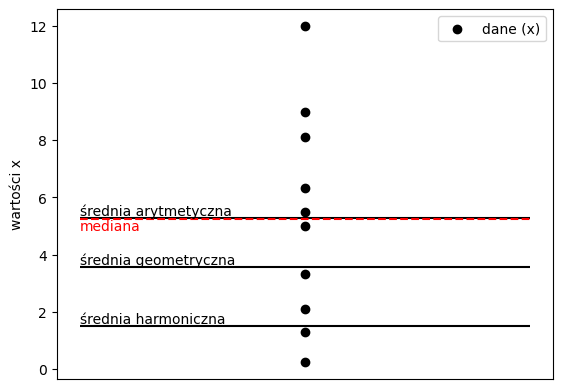

In [8]:
r = 0.01  # zakres osi poziomej (wartość pomocnicza do wykonania wykresu)
v = 0.1   # przesunięcie etykiety osi pionowej (wartość pomocnicza do wykonania wykresu)

plt.scatter(np.zeros_like(x),x,c="black") # wykres rozrzutu, przyjęto wartości wsp. poziomej jako 0,
                                # na osi pionowej zaznaczono wartości z próby (zmienna x)

plt.hlines([srednia_arytmetyczna, srednia_harmoniczna, srednia_geometryczna, Me], # linie poziome
            -r,r, # zakres wartości na osi poziomej - tu nieistotny
            colors=["black","black","black","red"], # określenie kolorów kolejnych linii
            linestyles=["solid","solid","solid","dashed"]) # określenie stylów kolejnych linii

# dodanie opisów do linii
plt.text(-r,srednia_arytmetyczna+v,"średnia arytmetyczna")
plt.text(-r,srednia_harmoniczna+v,"średnia harmoniczna")
plt.text(-r,srednia_geometryczna+v,"średnia geometryczna")
plt.text(-r,Me-4*v,"mediana",c="red")

plt.xticks([]) # usunięcie znaczników osi poziomej / zdanie pustej listy jako zanczników
plt.ylabel("wartości x") # opis osi pionowej
plt.legend(["dane (x)"]) # dodanie legendy do wykresu
pass

### Kwantyle
**Kwantyle** to pozycyjne miary położenia, które dzielą uporządkowaną próbę w zadanej proporcji $p:(1-p)$ gdzie $p\in [0,1]$. Kwantyle wyznacza się porządkując elementy próby rosnąco, a następnie określając wartości, które dzielą próbę w zadanej proporcji $p\cdot N$ elementów po lewej stronie i $(1-p)\cdot N$ elementów po stronie prawej.

Kwantylem rozdzielającym próbę na dwie równe części (czyli $p=0{,}5$) jest mediana.

Wyznaczenie kwantyli rzędu $p=0{,}25$, $p=0{,}5$ oraz $p=0{,}75$ z wykorzystaniem języka Python zaprezentowano poniżej:

In [9]:
p = [0.25, 0.5, 0.75] # rząd kwantyli
Q = np.quantile(x,p)
Q

array([2.4075, 5.25  , 7.6625])

## Parametry rozproszenia
Parametry rozproszenia opisują jak bardzo dane są skupione wokół wartości centralnej lub jaki mają zakres.

### Klasyczne miary rozproszenia
#### Wariancja i odchylenie standardowe
**Wariancja** jest to średnia arytmetyczna kwadratów odchyłek od średniej. (Ze względów teoretycznych dzieli się przez $N-1$ a nie przez $N$.) Wariancja wyraża rozproszenie wartości w próbie względem średniej. Im większa wariancja tym większy rozrzut wartości. Wariancję oznacza się zwykle jako $s^2$ i oblicza na podstawie wzoru:

$$s^2={\frac{1}{N-1}\sum_{i=1}^{N}(x_i-\bar{x})^2}$$

Obliczenie wariancji dla badanej próby ma następującą postać:

$$s^2={\frac{1}{N-1}\left((x_1-\bar{x})^2+(x_2-\bar{x})^2+\ldots +(x_N-\bar{x})^2 \right)}=$$
$$\frac{1}{9}\left[(9,00-5,289)^2+(12,00-5,289)^2+\ldots +(2,10-5,289)^2 +(6,32-5,289)^2 \right]=13.719$$

In [10]:
wariancja = st.tvar(x)
wariancja

13.719009999999999

W związku z tym, że wariancja wyrażona jest w jednostkach cechy do kwadratu w praktyce wygodniej jest używać **odchylenia standardowego**, będącego pierwiastkiem z wariancji:

$$s=\sqrt{s^2}=\sqrt{\frac{1}{N-1}\sum_{i=1}^{N}(x_i-\bar{x})^2}$$

In [11]:
odchylenie_standardowe = st.tstd(x)
odchylenie_standardowe

3.703918195640935

#### Odchylenie przeciętne

**Odchylenie przeciętne** jest średnią arytmetyczną z wartości bezwzględnych różnic między obserwacjami a średnią. Tak jak odchylenie standardowe wyraża stopień rozproszenia próby względem jej średniej. Odchylenie przeciętne jest mniej wrażliwe na obserwacje odstające. 

$$d = \frac{\sum_{i=1}^N |x_i-\bar{x}|}{N}$$

Sposób obliczenia wartości odchylenia przeciętnego dla badanej próby zaprezentowano poniżej:

$$d={\frac{1}{N}\left(|x_1-\bar{x}|+|x_2-\bar{x}|+\ldots +|x_N-\bar{x}| \right)}=$$
$$\frac{1}{10}\left(|9{,}00-5,289|+|12{,}00-5,289|+\ldots +|2{,}10-5{,}289| +|6{,}32-5{,}289| \right)=2{,}897$$

W bibliotece `scipy.stats` nie ma funkcji obliczającj odchylenie przeciętne i konieczne jest samodzielne zapisanie wzoru:

```{python}
                            d = np.sum(np.abs(x-st.tmean(x)))/x.size
```

 - funkcja `np.sum()` oblicza sumę
 - funkcja `np.abs()` oblicza wartość bezwzględną każdego argumentu w tablicy
 - wyrażenie `x-st.mean(x)` oblicza tablicę różnic między daną obserwacją $x_i$ a średnią obliczoną przy pomocy `st.mean()`
 - pole `x.size` jest liczbą elementów w tablicy `x`.
 
Możliwe jest też użycie funkcji `np.mean()` lub `st.tmean()` do obliczeń, wówczas wyrażenie zapisane w języku Python będzie miało następującą formę:

In [12]:
d = np.mean((np.abs(x-st.tmean(x))))
d

2.897

#### Średnie odchylenie bezwzględne
$$D = \frac{\sum_{i=1}^N |x_i-x_c|}{N}$$
gdzie $x_c$ jest ustaloną wartością centalną (zwykle średnią lub medianą). Wcześniej omówione odchylenie przeciętne jest przykładem tej wielkości.

In [13]:
xc = st.tmean(x) # średnia arytmetyczna
D = np.mean(np.abs(x-xc))
D

2.897

### Pozycyjne miary rozproszenia

#### Rozstęp
W statystyce opisowej rozstęp jest jedną z podstawowych miar rozproszenia. Wyraża różnicę między wartością największą i najmniejszą, czyli określa zakres obserwowanych wartości.

$$R=x_{max}-x_{min}$$

Obliczenie rozstępu wymaga znalezienia wartości największej i najmniejszej. W języku Python obliczenia te można zrealizować następująco:

In [14]:
R = np.max(x)-np.min(x)
R

11.77

#### Rozstęp międzykwartylowy
**Rozstęp międzykwartylowy** oznaczany zwykle symbolem IQR jest różnicą między wartością kwantyla rzędu $0,75$ i kwantyla $0,25$. Określa on różnicę między największą a najmniejszą wartością cechy wśród typowych jednostek. Między kwantylem $q_{0,75}$ a $q_{0,25}$ zawiera się 50% wszystkich elementów próby.

$$IQR=q_{0,75}-q_{0,25}$$

In [15]:
IQR = st.iqr(x)
IQR

5.254999999999999

#### Odchylenie ćwiartkowe
**Odchylenie ćwiartkowe** jest połową rozstępu kwartylowego
$$Q=\frac{IQR}{2}$$

#### Odchylenie bezwzględne medianowe

Jest to wartość podobna do odchylenia przeciętnego, lecz oparta na medianie, która jest odporna na obserwacje odstające. Również jest miarą dyspersji (rozproszenia) wartości w próbie.
$$MAD=mediana(|x_i-Me|)$$

In [16]:
MAD = st.median_abs_deviation(x)
MAD

3.005

### Współczynnik zmienności

**Współczynnik zmienności** wyraża stosunek odchylenia standardowego do średniej. Wyraża natężenie zróżnicowania analizowanej cechy. Duża wartość współczynnika zmienności oznacza silne zróżnicowanie cechy, natomiast wartość bliska zeru oznacza małe zróżnicowanie cechy. Współczynnik zmienności jest szczególnie przydatny przy porównywaniu prób.

$$V=\frac{s}{\bar{x}}$$

In [17]:
V = st.tstd(x)/st.tmean(x)
V

0.7003059549330564

Możliwe jest też oparcie współczynnika zmienności o inne parametry. przykładowo często stosowanym współczynnikiem zmienności jest stosunek odchylenia ćwiartkowego do mediany:
$$Q_{Me}=\frac{Q}{Me}$$

In [18]:
VMe = 0.5*st.iqr(x)/np.median(x)
VMe

0.5004761904761904

**Uwaga**: Oczywiście współczynniki te mają sens jedynie wtedy, gdy wartości użyte w mianowniku są różne od zera.

### Miary asymetrii rozkładu

**Moment trzeci centralny** jest średnią arytmetyczną odchyłek od średniej do sześcianu:

$$\mu_3=\frac{1}{N}\sum_{i=1}^{N}(x_i-\bar{x})^3$$

Jeśli 
 - $\mu_3=0$ to rozkład próby jest symetryczny
 - $\mu_3>0$ to asymetria jest dodatnia (więcej odchyłek dodatnich)
 - $\mu_3<0$ to asymetria jest ujmena (więcej odchyłek ujemnych)
 
Biblioteka [`sciy.stats`](https://docs.scipy.org/doc/scipy/reference/stats.html) oferuje funkcję [`moment()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.moment.html#scipy.stats.moment) obliczajacą n-ty centralny moment próby:

In [19]:
mi3 = st.moment(x,3) # 3 oznacza trzeci moment
mi3

14.39835922800001

#### Moment trzeci względny
Klasycznym parametrem wyrażającym asymetrię rozkładu jest **moment trzeci względny** będący ilorazem momentu trzeciego centralnego i trzeciej potęgi odchylenia standardowego. Przyjmuje wartości z zakresu $-2<\alpha_3<2$. Im jego wartość bliższa jest zeru tym bardziej symetryczny jest rozkład.

$$\alpha_3=\frac{\mu_3}{s^3}$$

In [20]:
alfa3 = st.moment(x,3)/st.tstd(x)**3
alfa3

0.2833536724003808

#### Współczynnik asymetrii

**Współczynnik asymetrii** wyraża stosunek różnicy średniej i mody odniesionej do odchylenia standardowego.

$$A=\frac{\bar{x}-Mo}{s}$$

In [21]:
# A = (st.tmean(x)-st.mode(x)[0])/st.tstd(x)
A = (st.tmean(x)-st.mode(x,keepdims=False)[0])/st.tstd(x)
A

1.3658508997185284

### Funkcja [`describe()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.describe.html#scipy.stats.describe) biblioteki [`scipy.stats`](https://docs.scipy.org/doc/scipy/reference/stats.html)

Funkcja ta oblicza kilka wyżej wymienionych charakterystyk próby za jednym razem, są to kolejno: 
 - liczba obserwacji
 - minimum i maksimum
 - średnia
 - wariancja
 - skośność
 - kurtoza
 
Obiektem zwracanym przez tę funkcję jest krotka. Aby dostać się do wybranego elementu należy użyć operatora indeksowania. 

In [22]:
spdesc = st.describe(x)
spdesc

DescribeResult(nobs=10, minmax=(0.23, 12.0), mean=5.289, variance=13.71901, skewness=0.3318677733919976, kurtosis=-0.829549790186106)

Pobranie wartości wariancji (czyli elementu o indeksie nr `3`):

In [23]:
spdesc[3]

13.71901